# Stastical Filter

## Introduction
In this notebook I applied 
#### 1- Implement the stastical edge detection filter using java code.
#### 2- Make equalization histogram in result of the image that applied  stastical filter using python_opencv.
#### 3- Implement dynamic size mask with diffrent angels 0,45,90,135 in java code.
#### 4- apply adaptive gaussian threshold in the previous result using python_opencv.
#### 5- Implement non-maximal suppression in the previous result by thinning the edges using python_opencv.


## 1- Implement stastical edge detection filter and dynamic mask.
The first I applied the gaussian filter to reduce noise 

In [14]:
import cv2
img = cv2.imread('images/gun.png',0)   
img_gaussian = cv2.GaussianBlur(img,(5,5),0)
picName="images/results/FilterGun_gaussian.png"
cv2.imwrite(picName,img_gaussian)

True

In java code I using 4 classes and one interface
The main code in  **StasticalFilter class**
And the other classes to implement kernal :
 **RegionOne class** for region one in kernal **RegionTwo class** for region two in kernal
 **RegionZero class** for region zero and **RegionItem Interface** that implemented by all regions


In [ ]:

package stastical.filter;
import java.awt.image.BufferedImage;
import java.awt.image.WritableRaster;
import java.io.File;
import java.io.IOException;
import java.util.ArrayList;
import java.util.logging.Level;
import java.util.logging.Logger;
import javax.imageio.ImageIO;



public class StasticalFilter { 
    
    private static int sizeKernal=7;
   
    
      public static void setSizeKernal(int size){
        sizeKernal=size;
    }
  
    
    
    public static void main(String[] args){
       setSizeKernal(7);
      applyStasticalFilter();
      printAllKernals();
          
        
    }
    
     public static void applyStasticalFilter(){         
        BufferedImage image=null,newImage=null ;   
        try {
            image = ImageIO.read(new File("images/FilterMouse_gaussian.png"));
        } catch (IOException ex) {
            Logger.getLogger(StasticalFilter.class.getName()).log(Level.SEVERE, null, ex);
        }
       newImage = new BufferedImage(image.getWidth(), image.getHeight(), BufferedImage.TYPE_BYTE_GRAY);
      
      
    
         ArrayList<RegionItem[][]> kernals = new ArrayList<>();
         kernals.add(makeKernal1());kernals.add(makeKernal2());
         kernals.add(makeKernal3());kernals.add(makeKernal4());
         WritableRaster raster=newImage.getRaster();
       
        
         
       System.out.println(image.getHeight()+" "+image.getWidth());
        int cntrl=Math.round(sizeKernal/2); 
         for(int i=0;i<image.getHeight()-sizeKernal;i++){
             for(int j=0;j<image.getWidth()-sizeKernal;j++){
                   float max=0;
                 for(int ki=0;ki<kernals.size();ki++){
                     RegionItem[][] kernal=kernals.get(ki);
                    for(int u=0;u<kernal.length;u++){
                        for(int v=0;v<kernal.length;v++){
                            int value=image.getData().getSample(j+u, i+v, 0);
                             kernal[u][v].add(value);
                        }
                    }
                    ArrayList<Integer> region1 = RegionOne.getRegion();
                    ArrayList<Integer> region2 = RegionTwo.getRegion();
                    int n1=region1.size();
                    int n2=region2.size();
                    float m1=RegionOne.getMean();
                    float m2=RegionTwo.getMean();
                    float v1=variance(region1, m1);
                    float v2=variance(region2, m2);
                    float tempMax=Math.max(f_test(v1, v2), t_test(n1, n2, v1, v2, m1, m2));
                    if(tempMax>max)max=tempMax;
                    RegionOne.clear();
                    RegionTwo.clear();
                }
               
                 
                 raster.setSample(j+cntrl, i+cntrl, 0, max);
            }
         }
    
         BufferedImage image2 = new BufferedImage(newImage.getColorModel(),raster,true,null);
           File ouptut = new File("images/Stastical_Filter_MP_K_7.png");
        try {
            ImageIO.write(image2, "png", ouptut);
        } catch (IOException ex) {
            Logger.getLogger(StasticalFilter.class.getName()).log(Level.SEVERE, null, ex);
        }
        
    }
    
    

   

  /************** Stastical Calulations *****************8*/
    public  static float mean(ArrayList<Integer> array){
        float sum=0.0f;
    for(int i=0;i<array.size();i++){
        sum=sum+array.get(i);
    }
    
        return sum/array.size();
    }
    
    public static float variance(ArrayList<Integer> array,float mean){
        double temp = 0;
        for(int i=0;i<array.size();i++)
        {temp += (array.get(i)-mean)*(array.get(i)-mean);}
        //the minimum variance  must be 1.0 to avoid divide by zero
        return Math.max(1f,(float)temp/(array.size()-1));
    }
    
    public static float alpha(int n1,int n2, float v1,float v2){
        float alpha=((n1*v1)+(n2*v2))/((n1+n2)-2);
        return alpha;
    }
    
    public static float f_test(float v1,float v2){
        return Math.max(v1/v2, v2/v1);
    }
    
    public static float t_test(int n1,int n2,float v1,float v2,float m1,float m2){
       float a=alpha(n1,n2,v1,v2);
       float t=(float)(Math.abs(m1-m2)/(Math.sqrt((a*(n1+n2))/(n1*n2))));
        return t;
    }
    
      /*********************************************************************/
    
    
          /* Implment Dynamic masks*/
    
      /* #90 dergree*/
      public static RegionItem[][]  makeKernal1(){
          int size=sizeKernal;
      int interval=  Math.round(size/2);
 
        
        RegionItem[][] kernal = new RegionItem[size][size];
       for(int i=0;i<size;i++){
           for(int j=0;j<interval;j++){
             kernal[i][j]=new RegionOne();  
           }
       }
       for(int i=0;i<size;i++){
          kernal[i][interval]=new RegionZero();
       }  
       for(int i=0;i<size;i++){
           for(int j=interval+1;j<size;j++){
             kernal[i][j]=new RegionTwo();  
           }
       }
       return kernal;
    }
      /*# 45 dergree*/
    public static RegionItem[][]  makeKernal2(){
       int size=sizeKernal;
        int row=size-1,col=row;
         RegionItem[][] kernal = new RegionItem[size][size];
       for(int i=0;i<row;i++){
           for(int j=0;j<col;j++){
             kernal[i][j]=new RegionOne();  
           }
           col--;
       }
       for(int i=0;i<size;i++){
          
         kernal[i][size-i-1]= new RegionZero();
       }  
       row=size-1;
      // col=row;
       for(int i=1;i<=row;i++){
           
           for(int j=row;j>row-i;j--){
             kernal[i][j]=new RegionTwo();  
           } 
         
       }
       
       return kernal;
    }
    /*# 135 dergree*/
    public static RegionItem[][]  makeKernal3(){
        int size=sizeKernal;    
        RegionItem[][] kernal = new RegionItem[size][size];
        for(int i=1;i<size;i++){
           for(int j=0;j<i;j++){
             kernal[i][j]=new RegionOne();  
           }
       }
       
       for(int i=0;i<size;i++){ 
         kernal[i][i]=new RegionZero(); 
       }  

         int c;
      for(int i=0;i<size;i++){
          c=i+1;
           for(int j=c++;j<size;j++){
             kernal[i][j]=new RegionTwo();  
           } 
         
       }
       
       return kernal;
    }
    /*#0 dergree*/
    public static RegionItem[][]  makeKernal4(){
         int size=sizeKernal;
      int interval=  Math.round(size/2);
      
        RegionItem[][] kernal = new RegionItem[size][size];
       for(int i=0;i<interval;i++){
           for(int j=0;j<size;j++){
             kernal[i][j]=new RegionOne();  
           }
       }
       for(int i=0;i<size;i++){
          kernal[interval][i]=new RegionZero();
       }  
       for(int i=interval+1;i<size;i++){
           for(int j=0;j<size;j++){
             kernal[i][j]=new RegionTwo();  
           }
       }
       return kernal;
    }
   
      public static void printAllKernals(){
         System.out.println("\n\n================90 Degree============================\n");
        printMatrix(makeKernal1());
         System.out.println("\n\n================45 Degree============================\n");
        printMatrix(makeKernal2());
         System.out.println("\n\n================135 Degree===========================\n");
       printMatrix(makeKernal3());
         System.out.println("\n\n================0 Degree=============================\n");
         printMatrix(makeKernal4());
    }
      
   public static void printMatrix(RegionItem[][] kernal){
       for(int i=0;i<kernal.length;i++){
           for(int j=0;j<kernal.length;j++){
               System.out.print(kernal[i][j]+"\t");
           }
            System.out.println();
       }
   }
   
 
    /*********************************************************************/
    

}



In [ ]:
package stastical.filter;


interface RegionItem {
   public void add(int n);
   
    @Override
    public String toString();
}


In [ ]:
package stastical.filter;

import java.util.ArrayList;


class RegionOne implements RegionItem{
    static int sum=0;
static ArrayList<Integer>arrayRegion;

    public RegionOne(){
    arrayRegion=new ArrayList<>();
    }
    
    @Override
    public void add(int n) {
        sum+=n;
       arrayRegion.add(n);
    }
    
    public static ArrayList<Integer> getRegion() {
      return arrayRegion;
    }
    
    public static float getMean() {
      return sum/arrayRegion.size();
    }
    
    public static void clear(){
         sum=0;
        arrayRegion.clear();
    }
    @Override
    public String toString(){
        return "1";
    } 
    
}


In [ ]:
package stastical.filter;

import java.util.ArrayList;

class RegionTwo implements RegionItem {
static ArrayList<Integer>arrayRegion; 
static int sum=0;
 public RegionTwo(){
    arrayRegion=new ArrayList<>();
    }
    
    @Override
    public void add(int n) {
     sum+=n;
     arrayRegion.add(n);
    }

    public static ArrayList<Integer> getRegion() {
       return arrayRegion;
    }

    
    public static float getMean() {
      return sum/arrayRegion.size();
    }
    
    public static void clear(){
        sum=0;
        arrayRegion.clear();
    }
    
    @Override
    public String toString(){
        return "2";
    }
    

    
}


In [ ]:
package stastical.filter;

class RegionZero implements RegionItem{

    @Override
    public void add(int n) {}
    
  @Override
    public  String toString(){
        return "0";
    }
    
     
}


after applying the statical filter with kernals 5 and 7 in gun and mouse images the results are:

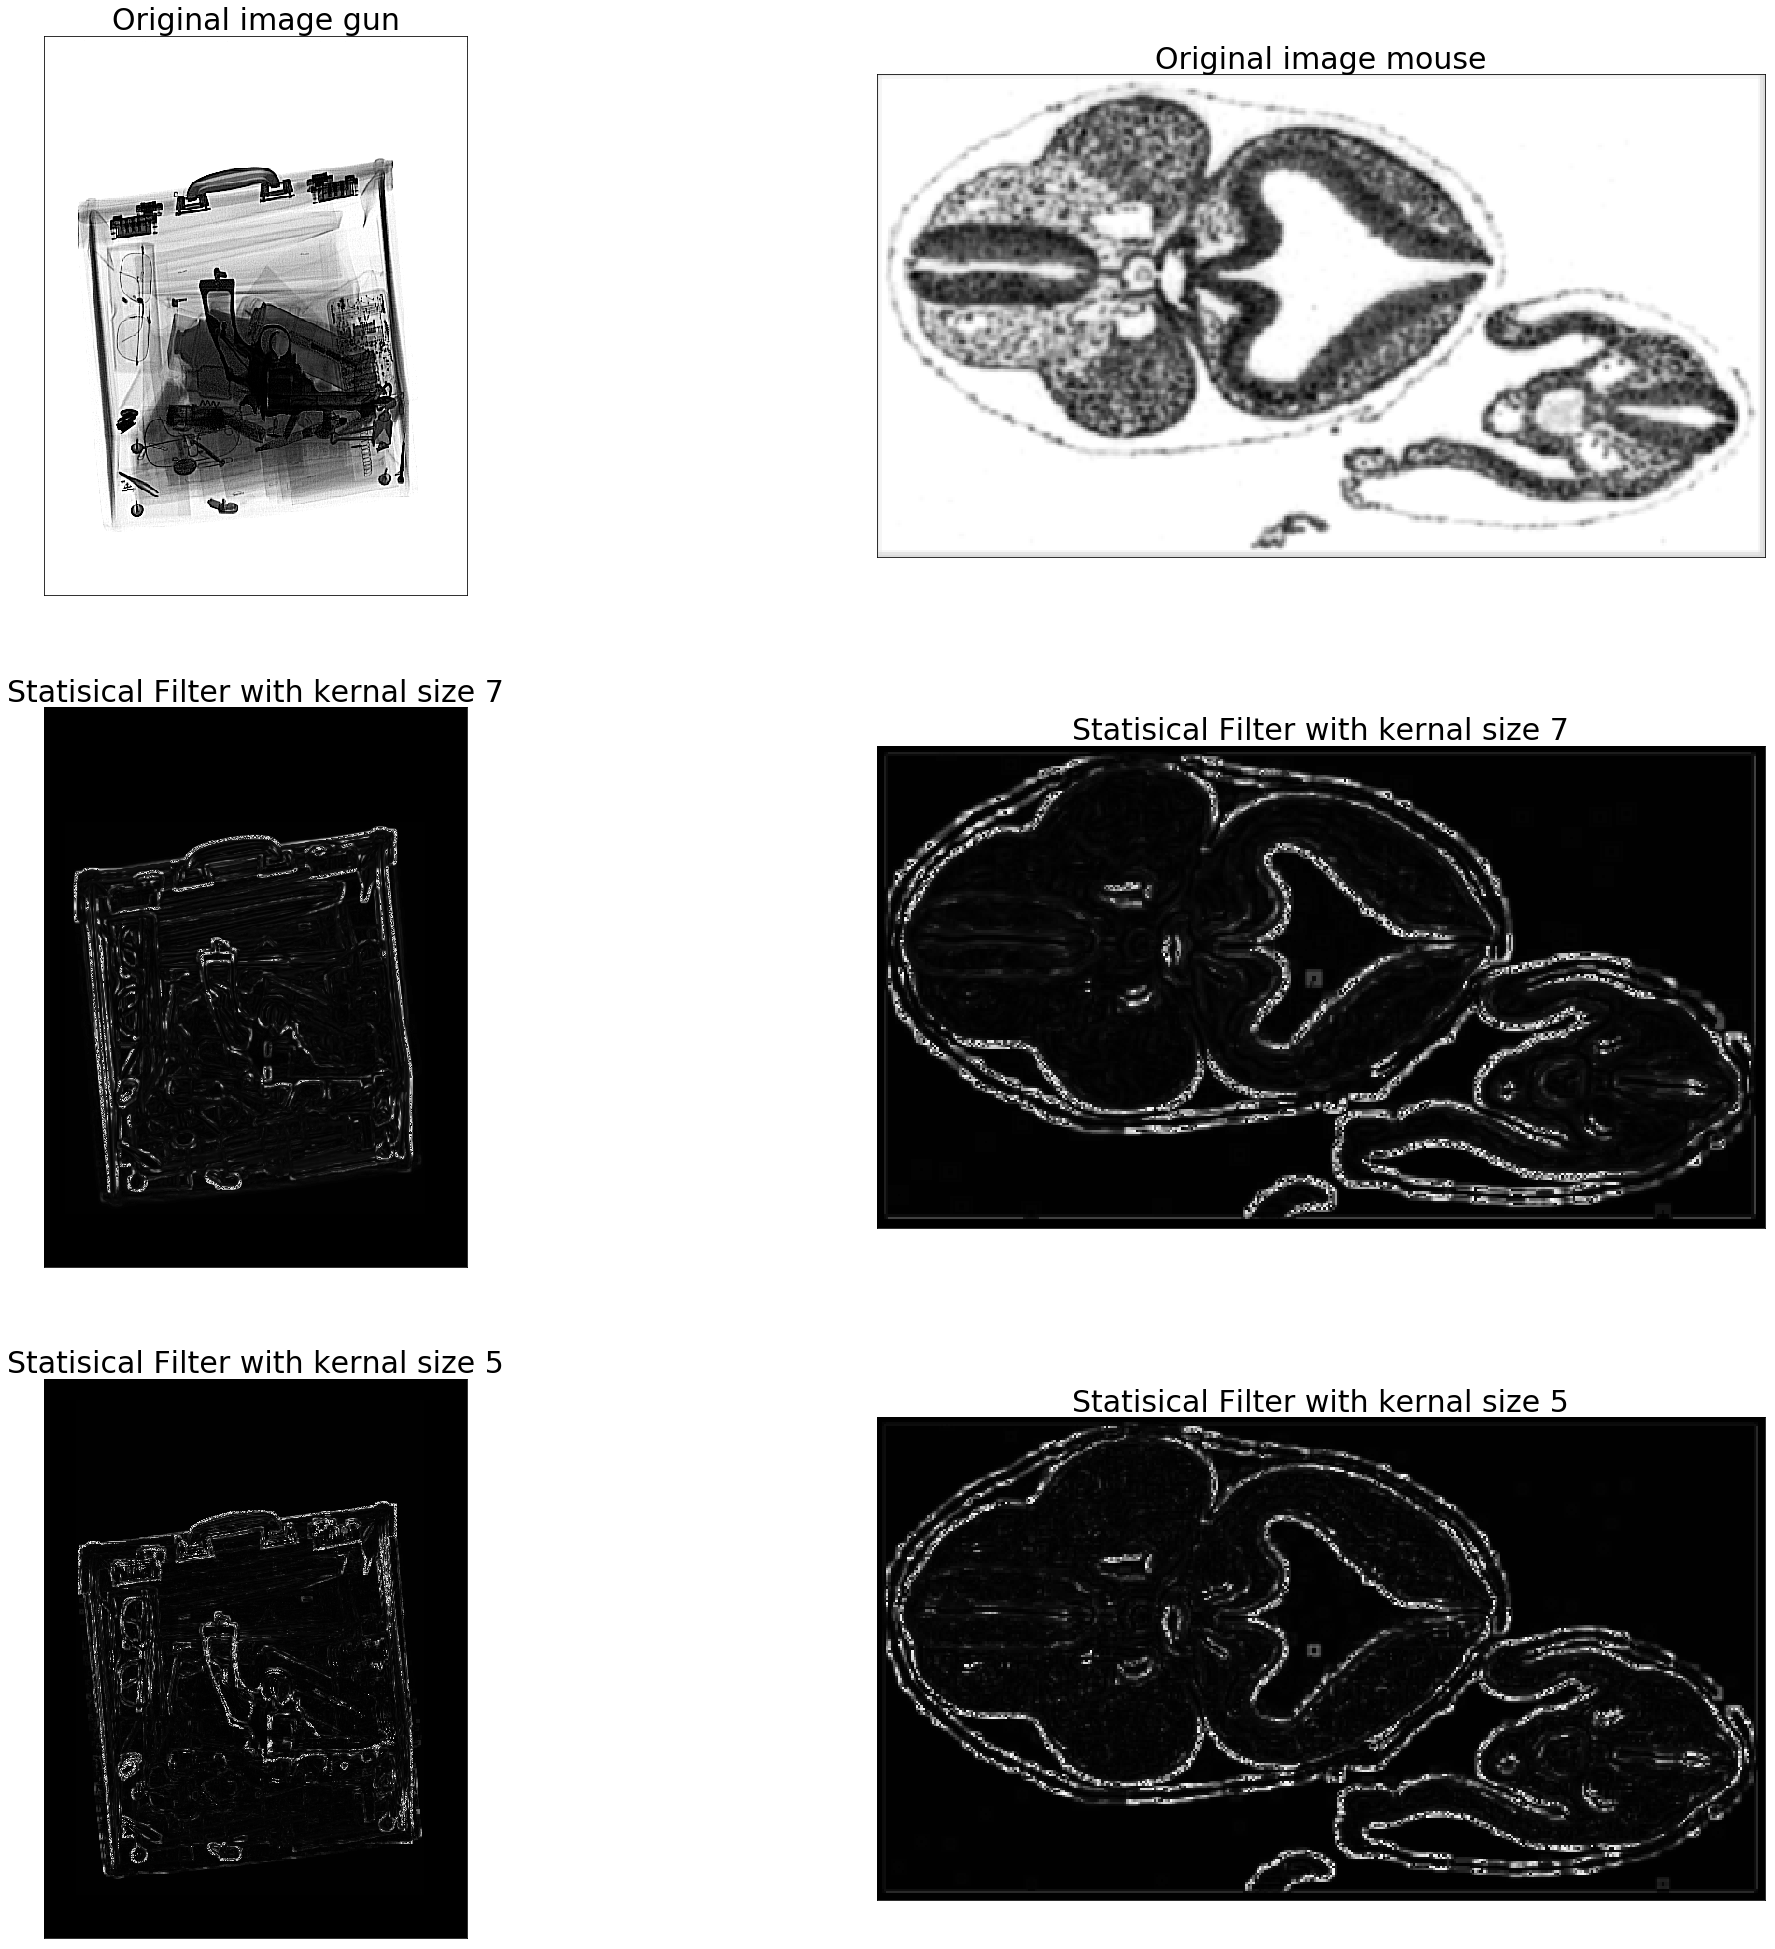

In [15]:
from matplotlib import pyplot as plt
import cv2
plt.figure(figsize=(35, 35))
plt.rcParams.update({'font.size': 25})
plt.subplot(3,2,1),plt.imshow(cv2.imread('images/gun_gaussian.png',0) ,cmap = 'gray')
plt.title('Original image gun'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(cv2.imread('images/FilterMouse_gaussian.png',0),cmap = 'gray')
plt.title('Original image mouse'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(cv2.imread('images/results/Stastical_Filter_K_7.png',0),cmap = 'gray')
plt.title('Statisical Filter with kernal size 7'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(cv2.imread('images/results/Stastical_Filter_MP_K_7.png',0),cmap = 'gray')
plt.title('Statisical Filter with kernal size 7'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(cv2.imread('images/results/Stastical_Filter_K_5.png',0),cmap = 'gray')
plt.title('Statisical Filter with kernal size 5'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(cv2.imread('images/results/Stastical_Filter_MP_K_5.png',0),cmap = 'gray')
plt.title('Statisical Filter with kernal size 5'), plt.xticks([]), plt.yticks([])
plt.show()

## 2- Apply histogram equalization in the image

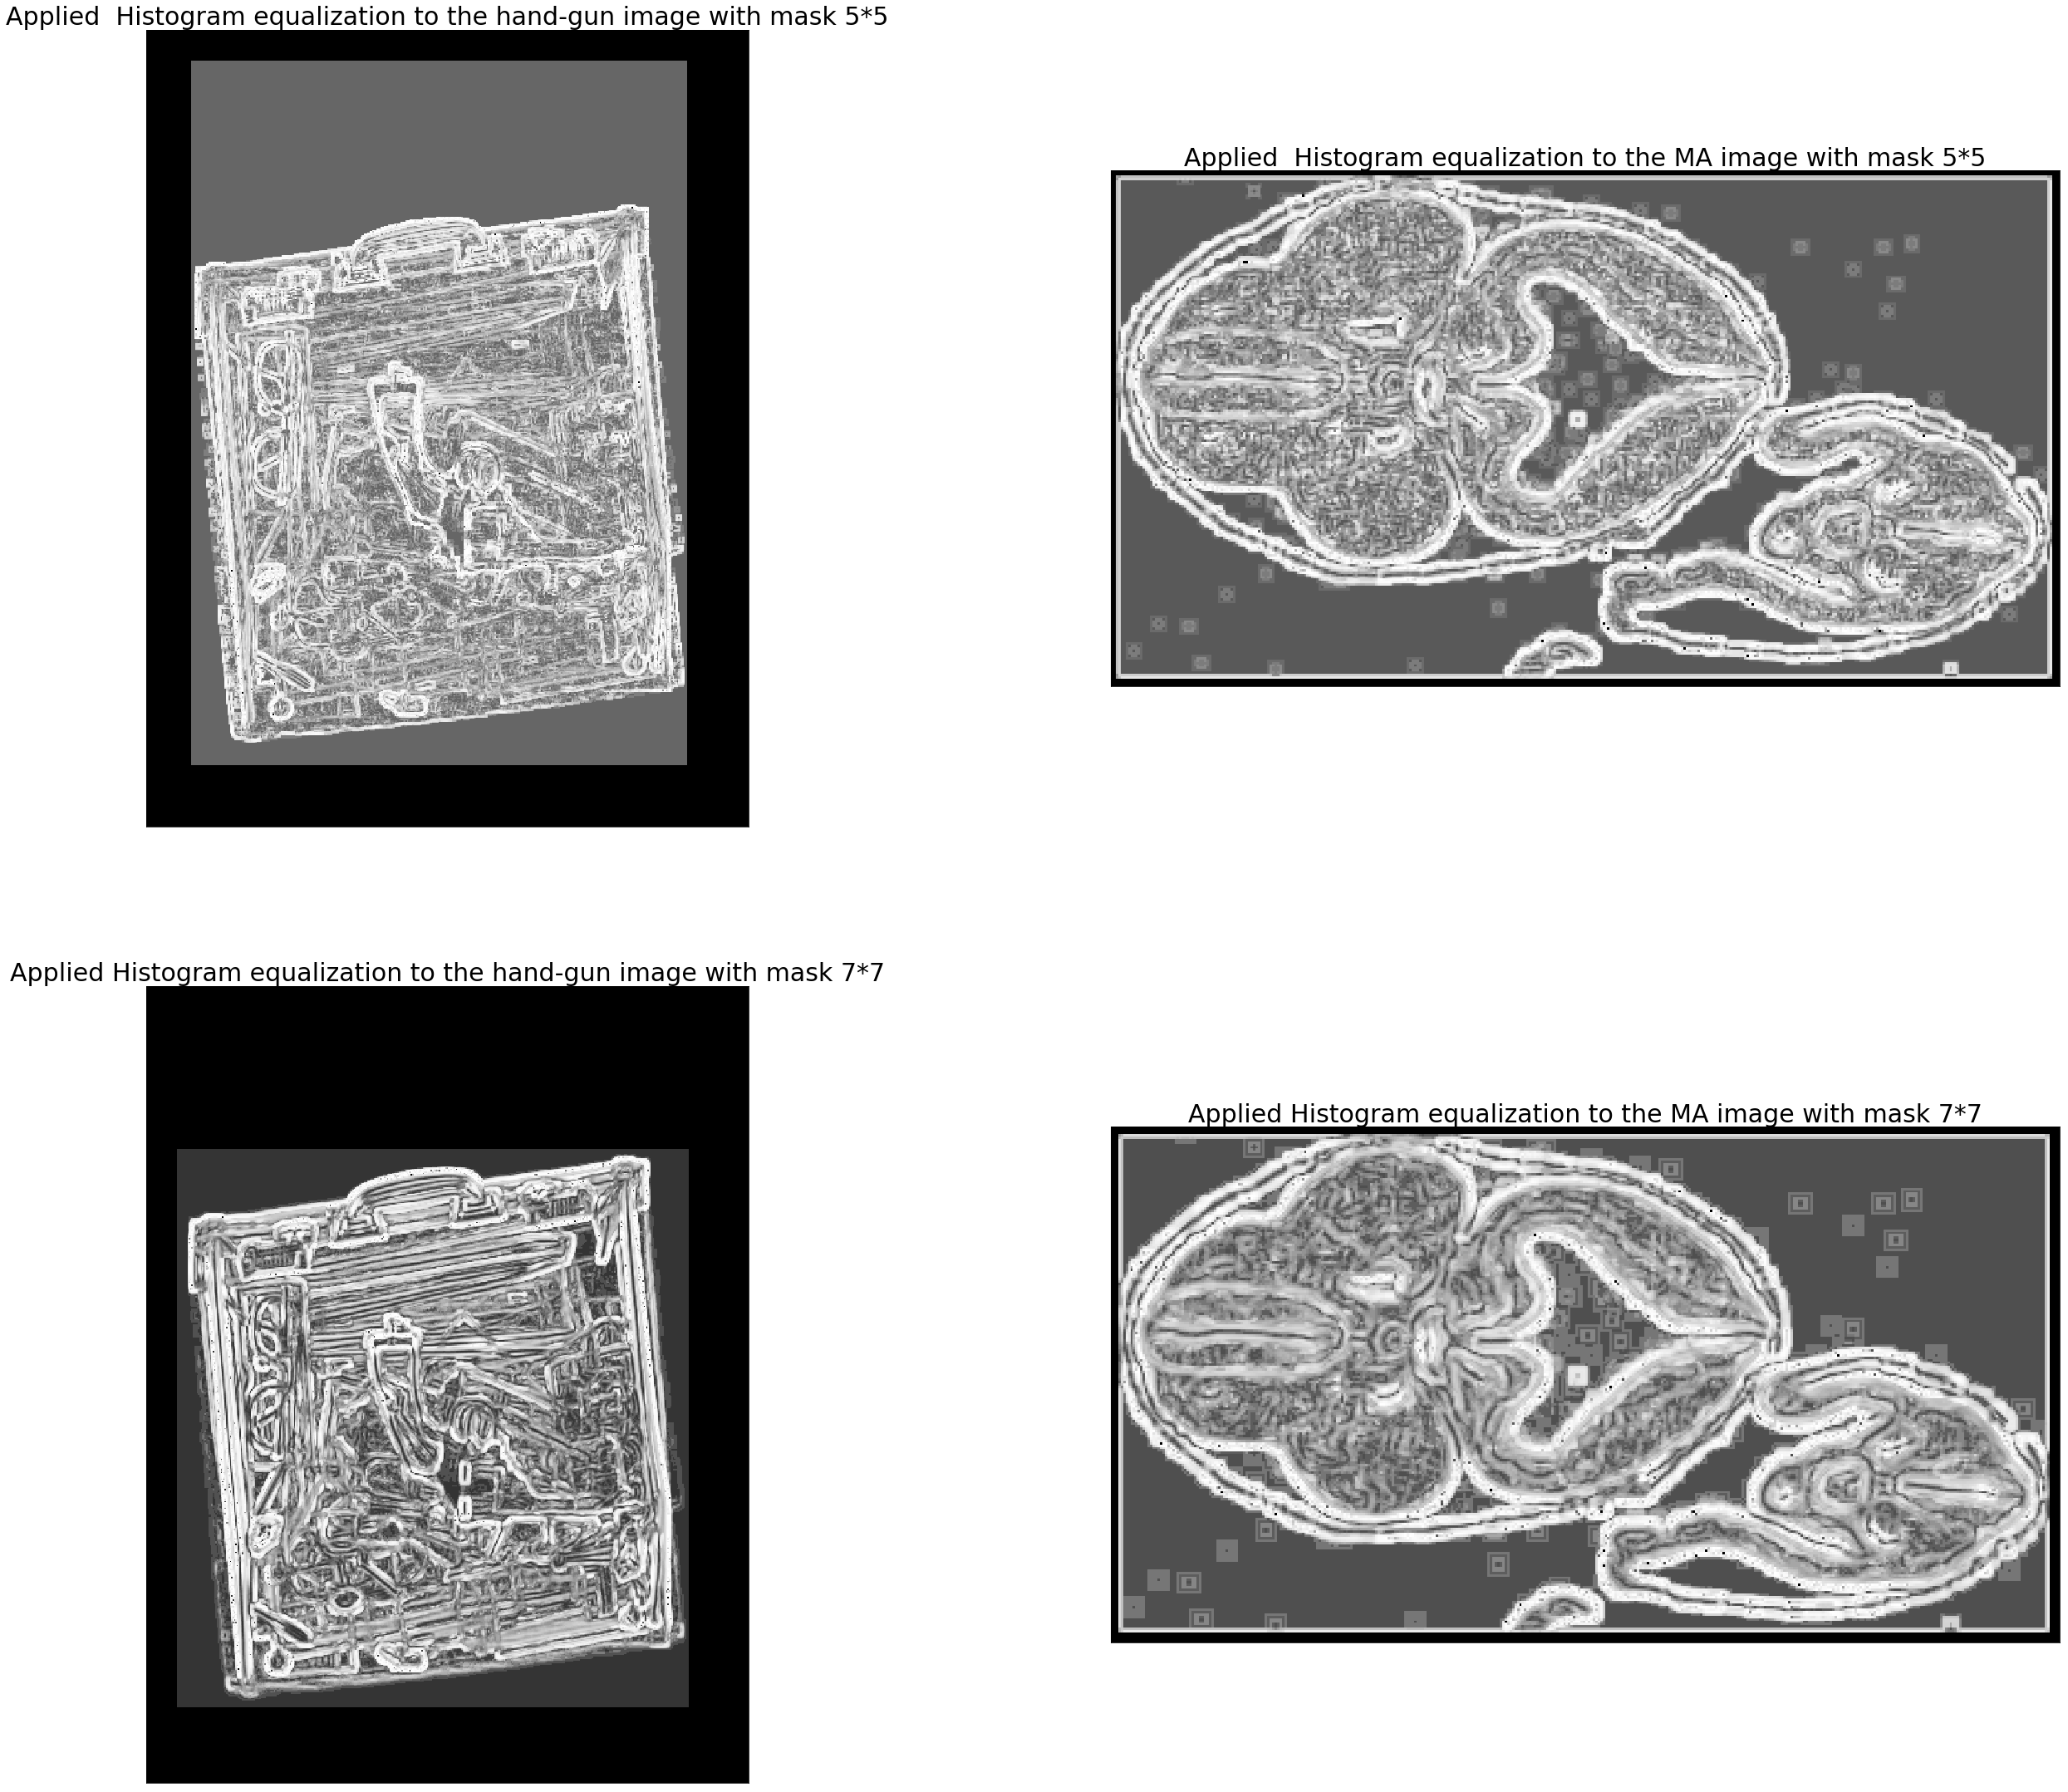

True

In [25]:
import cv2
from matplotlib import pyplot as plt
img_gun_7=cv2.imread('images/results/Stastical_Filter_K_7.png',0)
img_gun_5 =cv2.imread('images/results/Stastical_Filter_K_5.png',0)
img_ma_7=cv2.imread('images/results/Stastical_Filter_MP_K_7.png',0)
img_ma_5=cv2.imread('images/results/Stastical_Filter_MP_K_5.png',0)
img_gun_7=cv2.equalizeHist(img_gun_7)
img_gun_5=cv2.equalizeHist(img_gun_5)
img_ma_7=cv2.equalizeHist(img_ma_7)
img_ma_5=cv2.equalizeHist(img_ma_5)

plt.figure(figsize=(45, 60))
plt.rcParams.update({'font.size': 25})
plt.subplot(3,2,1),plt.imshow(img_gun_5 ,cmap = 'gray')
plt.title('Applied  Histogram equalization to the hand-gun image with mask 5*5'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(img_ma_5,cmap = 'gray')
plt.title('Applied  Histogram equalization to the MA image with mask 5*5'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(img_gun_7,cmap = 'gray')
plt.title('Applied Histogram equalization to the hand-gun image with mask 7*7'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(img_ma_7,cmap = 'gray')
plt.title('Applied Histogram equalization to the MA image with mask 7*7'), plt.xticks([]), plt.yticks([])
plt.show()

Based on previous results  we conclude that mask 7\*7 it's more clear than 5\*5 size for MA and hand-gun images. 

## 3- Implement dynamic size mask with diffrent angels


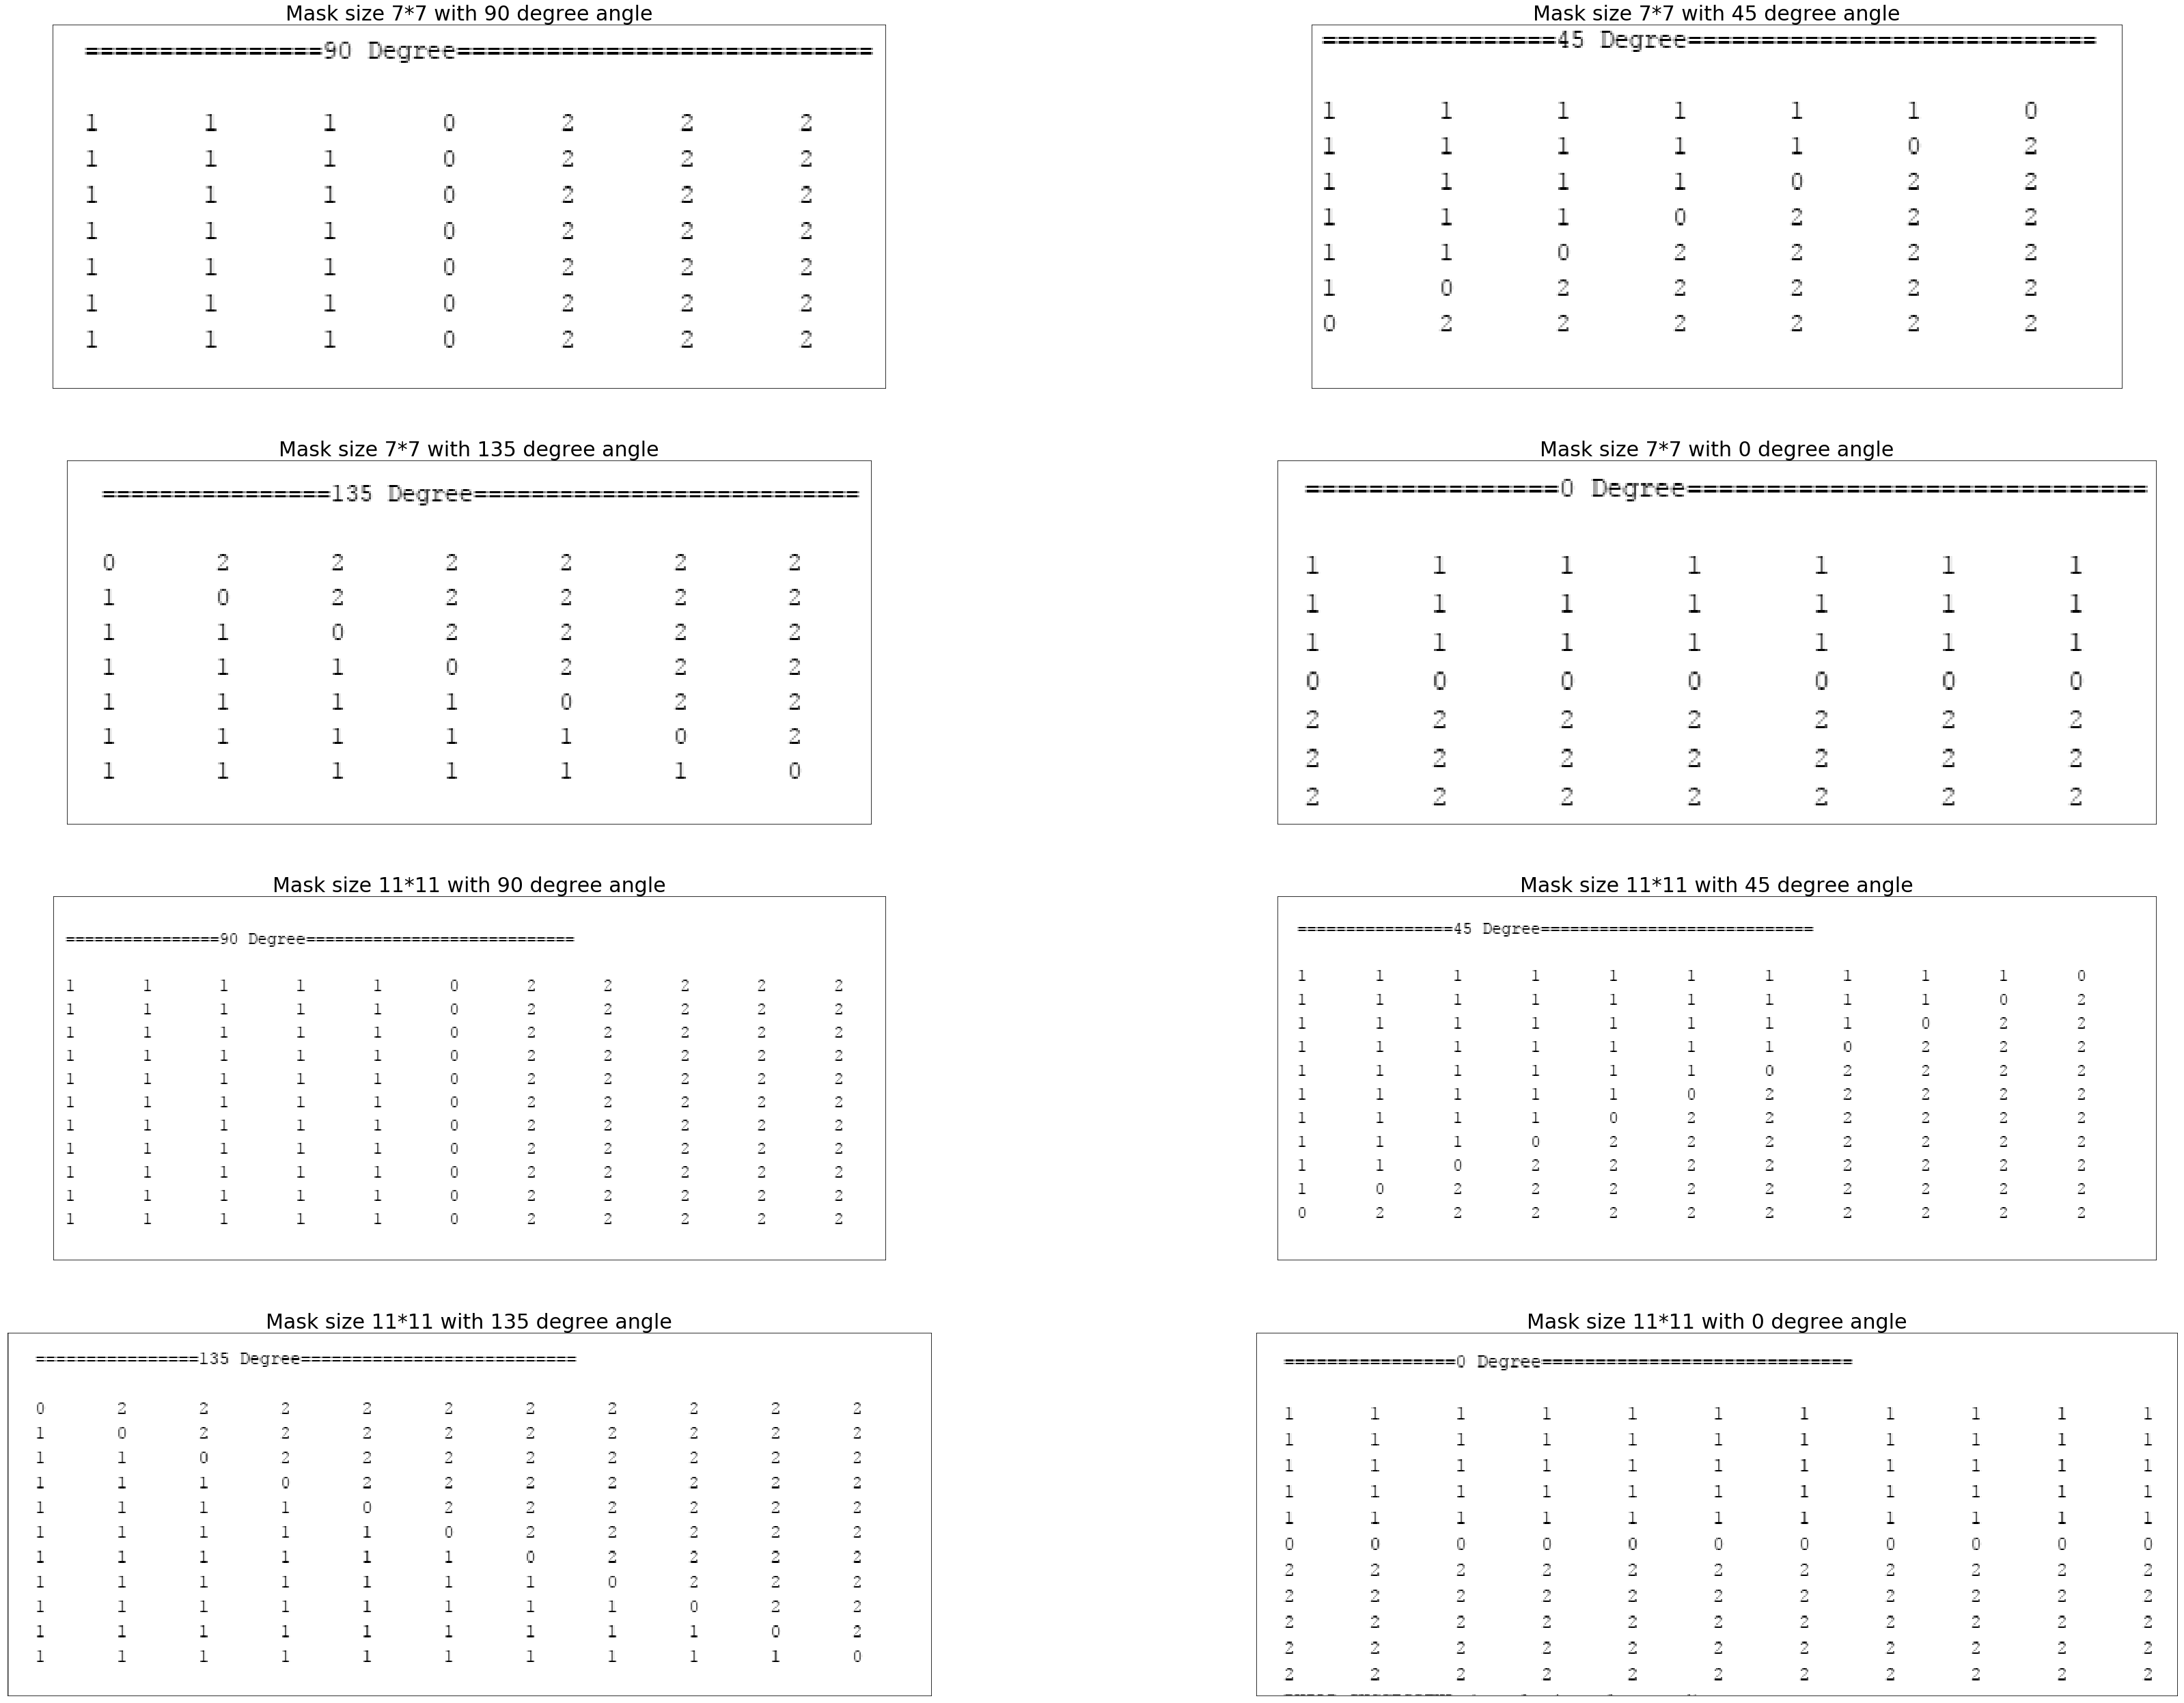

In [27]:
import cv2
from matplotlib import pyplot as plt
plt.figure(figsize=(60, 45))
plt.rcParams.update({'font.size': 25})
plt.subplot(4,2,1),plt.imshow(cv2.imread('images/masks/F_7_90D.png',0) ,cmap = 'gray')
plt.title('Mask size 7*7 with 90 degree angle'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,2),plt.imshow(cv2.imread('images/masks/F_7_45D.png',0),cmap = 'gray')
plt.title('Mask size 7*7 with 45 degree angle'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,3),plt.imshow(cv2.imread('images/masks/F_7_135D.png',0),cmap = 'gray')
plt.title('Mask size 7*7 with 135 degree angle'),plt.xticks([]), plt.yticks([])
plt.subplot(4,2,4),plt.imshow(cv2.imread('images/masks/F_7_0D.png',0),cmap = 'gray')
plt.title('Mask size 7*7 with 0 degree angle'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,5),plt.imshow(cv2.imread('images/masks/F_11_90D.png',0) ,cmap = 'gray')
plt.title('Mask size 11*11 with 90 degree angle'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,6),plt.imshow(cv2.imread('images/masks/F_11_45D.png',0),cmap = 'gray')
plt.title('Mask size 11*11 with 45 degree angle'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,7),plt.imshow(cv2.imread('images/masks/F_11_135D.png',0),cmap = 'gray')
plt.title('Mask size 11*11 with 135 degree angle'),plt.xticks([]), plt.yticks([])
plt.subplot(4,2,8),plt.imshow(cv2.imread('images/masks/F_11_0D.png',0),cmap = 'gray')
plt.title('Mask size 11*11 with 0 degree angle'), plt.xticks([]), plt.yticks([])
plt.show()


## 4- apply adaptive gaussian threshold in the previous result .

## 5- Implement non-maximal suppression in the previous result by thining the edges.

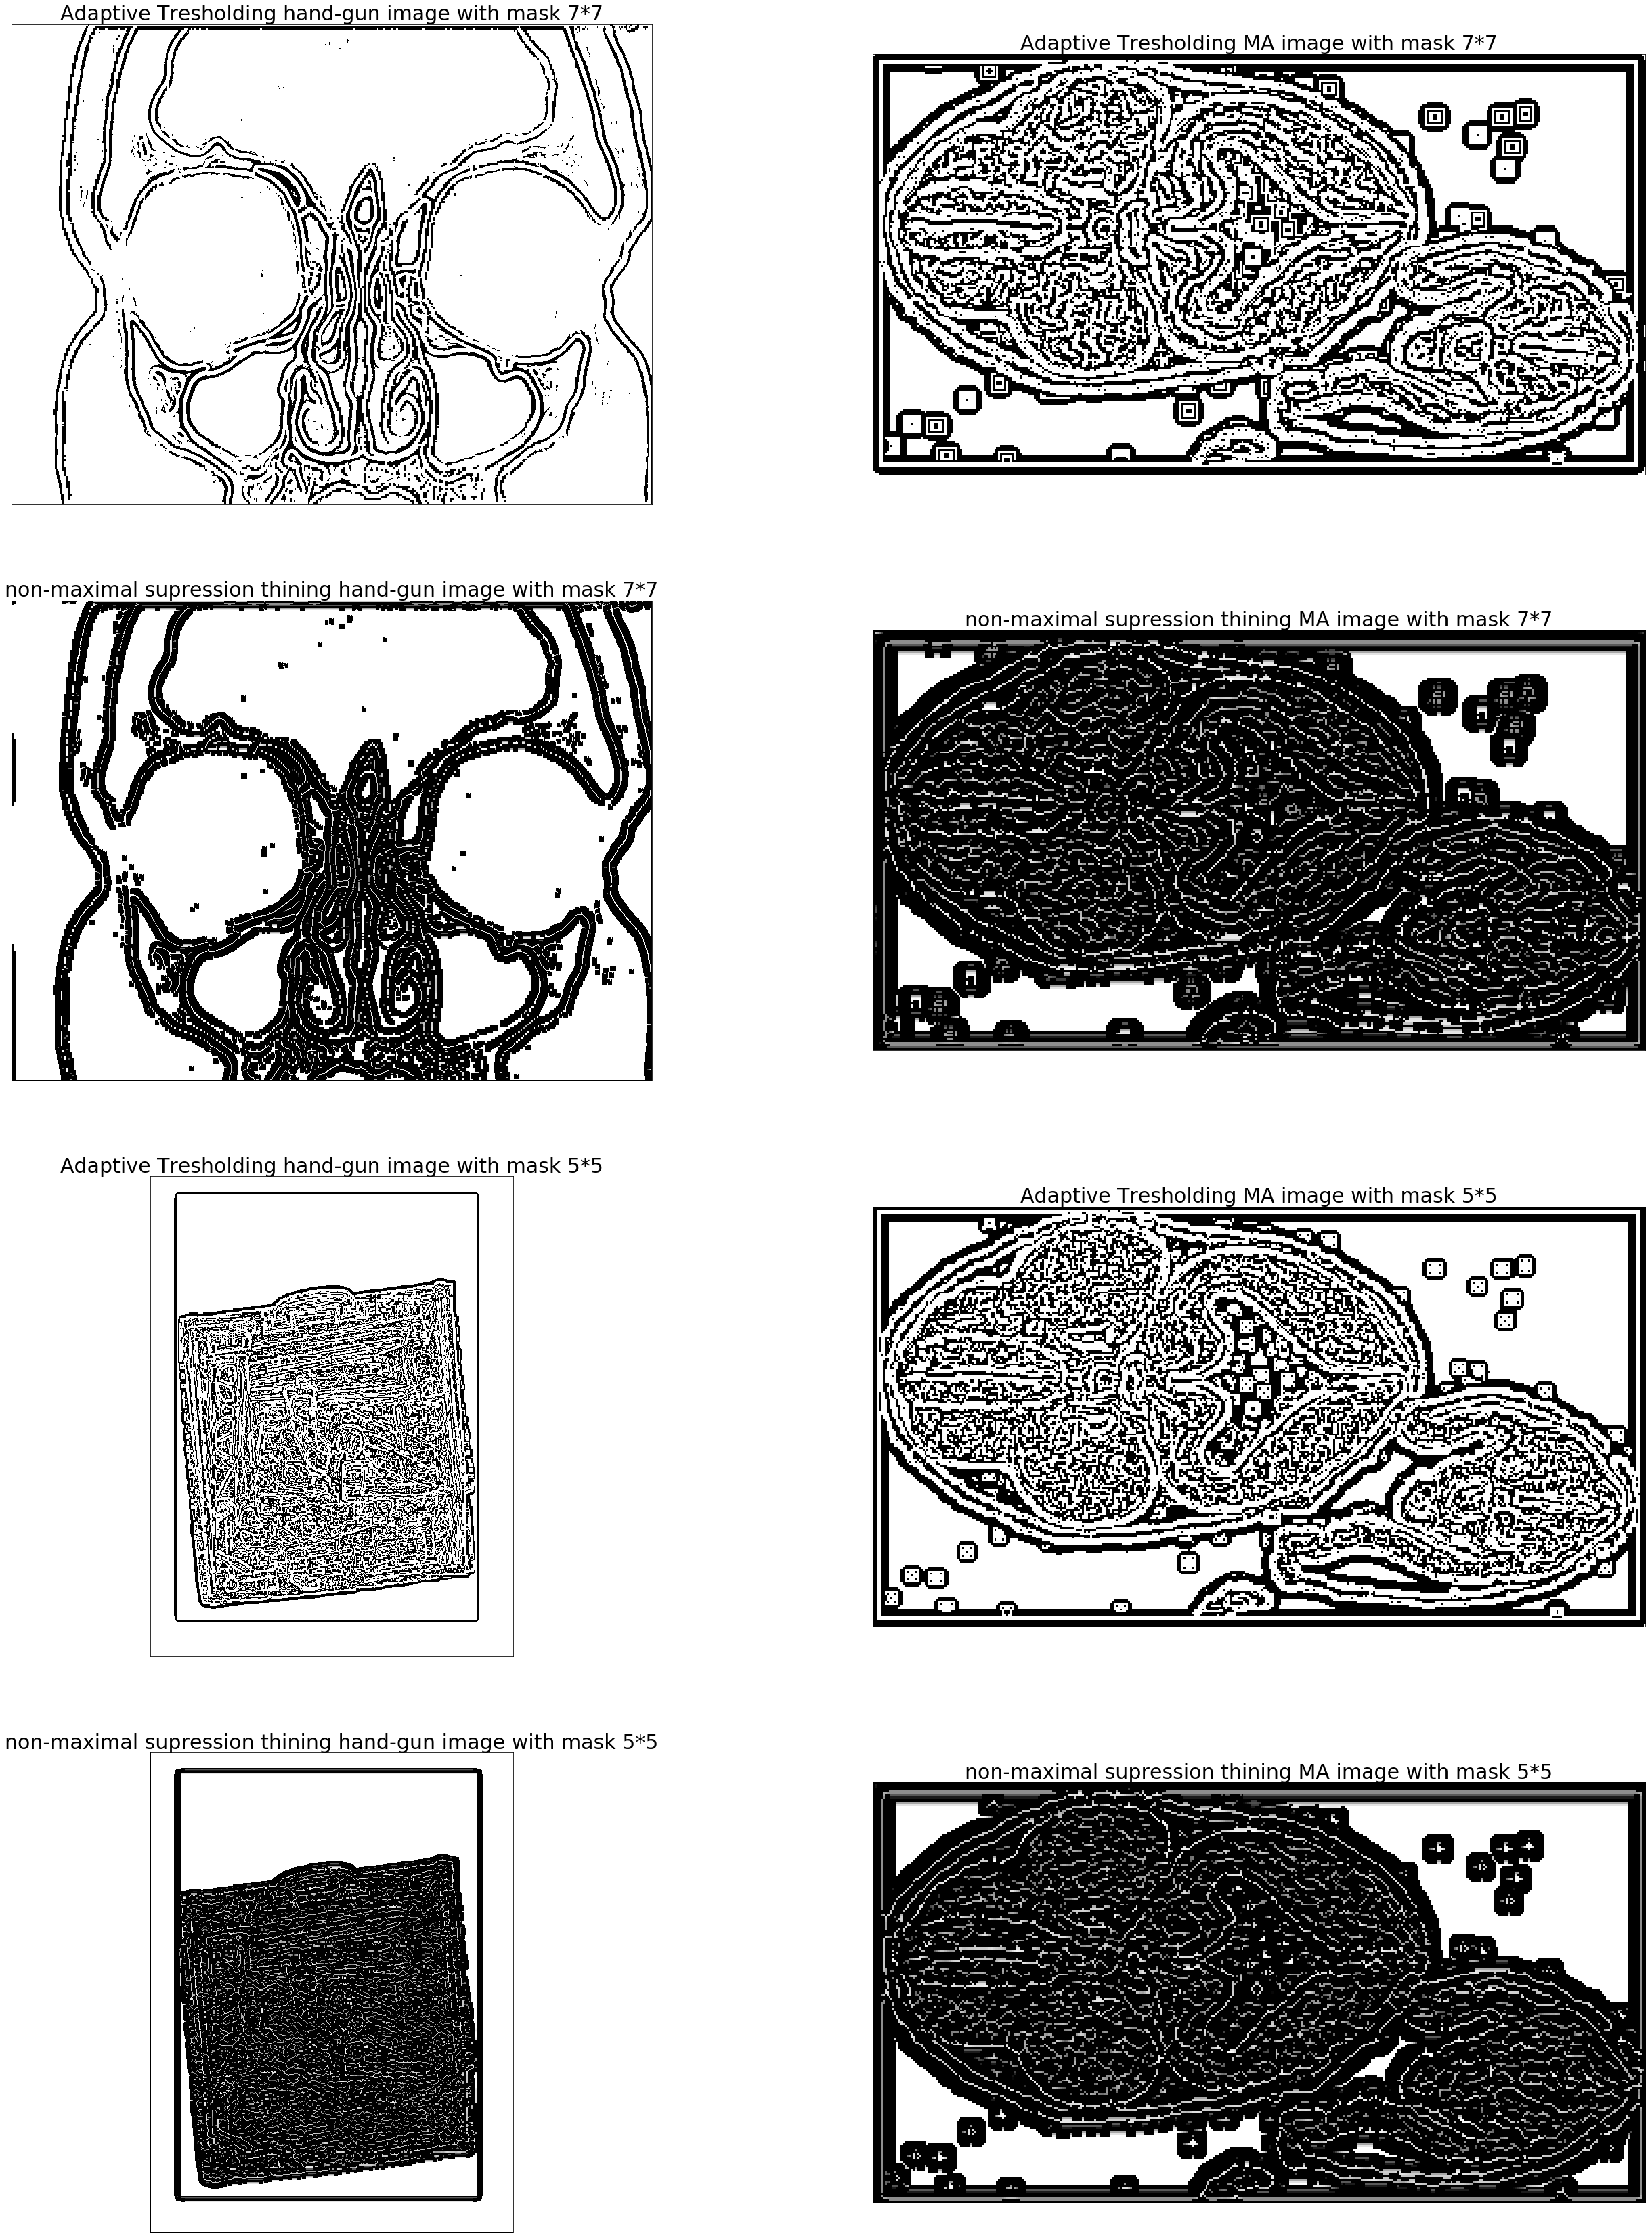

In [7]:
import cv2
from matplotlib import pyplot as plt
from nonmax_suppression import maximum
from gaussian_filter import gaussian
from gradient import gradient

img_gun_7_th=cv2.imread('images/results/sobel2.jpg',0)
img_gun_5_th =cv2.imread('images/results/stastical_filter_equlization_K_5.png',0)
img_ma_7_th=cv2.imread('images/results/stastical_filter_equlization_MA_K_7.png',0)
img_ma_5_th=cv2.imread('images/results/stastical_filter_equlization_MA_K_5.png',0)

img_gun_7_th=cv2.adaptiveThreshold(img_gun_7_th,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,4)
img_gun_5_th=cv2.adaptiveThreshold(img_gun_5_th,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
img_ma_7_th=cv2.adaptiveThreshold(img_ma_7_th,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)
img_ma_5_th=cv2.adaptiveThreshold(img_ma_5_th,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,9,2)

img_gun_7_max = gaussian(img_gun_7_th)
img_gun_5_max = gaussian(img_gun_5_th)
img_ma_7_max = gaussian(img_ma_7_th)
img_ma_5_max = gaussian(img_ma_5_th)

grim,gphase1= gradient(img_gun_7_th)
grim,gphase2= gradient(img_gun_5_th)
grim,gphase3= gradient(img_ma_7_th)
grim,gphase4= gradient(img_ma_5_th)

img_gun_7_max = maximum(img_gun_7_max, gphase1)
img_gun_5_max = maximum(img_gun_5_max, gphase2)
img_ma_7_max = maximum(img_ma_7_max, gphase3)
img_ma_5_max = maximum(img_ma_5_max, gphase4)


plt.figure(figsize=(45, 60))
plt.rcParams.update({'font.size': 25})
plt.subplot(4,2,1),plt.imshow(img_gun_7_th ,cmap = 'gray')
plt.title('Adaptive Tresholding hand-gun image with mask 7*7'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,2),plt.imshow(img_ma_7_th,cmap = 'gray')
plt.title('Adaptive Tresholding MA image with mask 7*7'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,3),plt.imshow(img_gun_7_max,cmap = 'gray')
plt.title('non-maximal supression thining hand-gun image with mask 7*7'),plt.xticks([]), plt.yticks([])
plt.subplot(4,2,4),plt.imshow(img_ma_7_max,cmap = 'gray')
plt.title('non-maximal supression thining MA image with mask 7*7'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,5),plt.imshow(img_gun_5_th ,cmap = 'gray')
plt.title('Adaptive Tresholding hand-gun image with mask 5*5'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,6),plt.imshow(img_ma_5_th,cmap = 'gray')
plt.title('Adaptive Tresholding MA image with mask 5*5'), plt.xticks([]), plt.yticks([])
plt.subplot(4,2,7),plt.imshow(img_gun_5_max,cmap = 'gray')
plt.title('non-maximal supression thining hand-gun image with mask 5*5'),plt.xticks([]), plt.yticks([])
plt.subplot(4,2,8),plt.imshow(img_ma_5_max,cmap = 'gray')
plt.title('non-maximal supression thining MA image with mask 5*5'), plt.xticks([]), plt.yticks([])
plt.show()


## the difference between Stastical filter , Canny filter , Laplacian filter

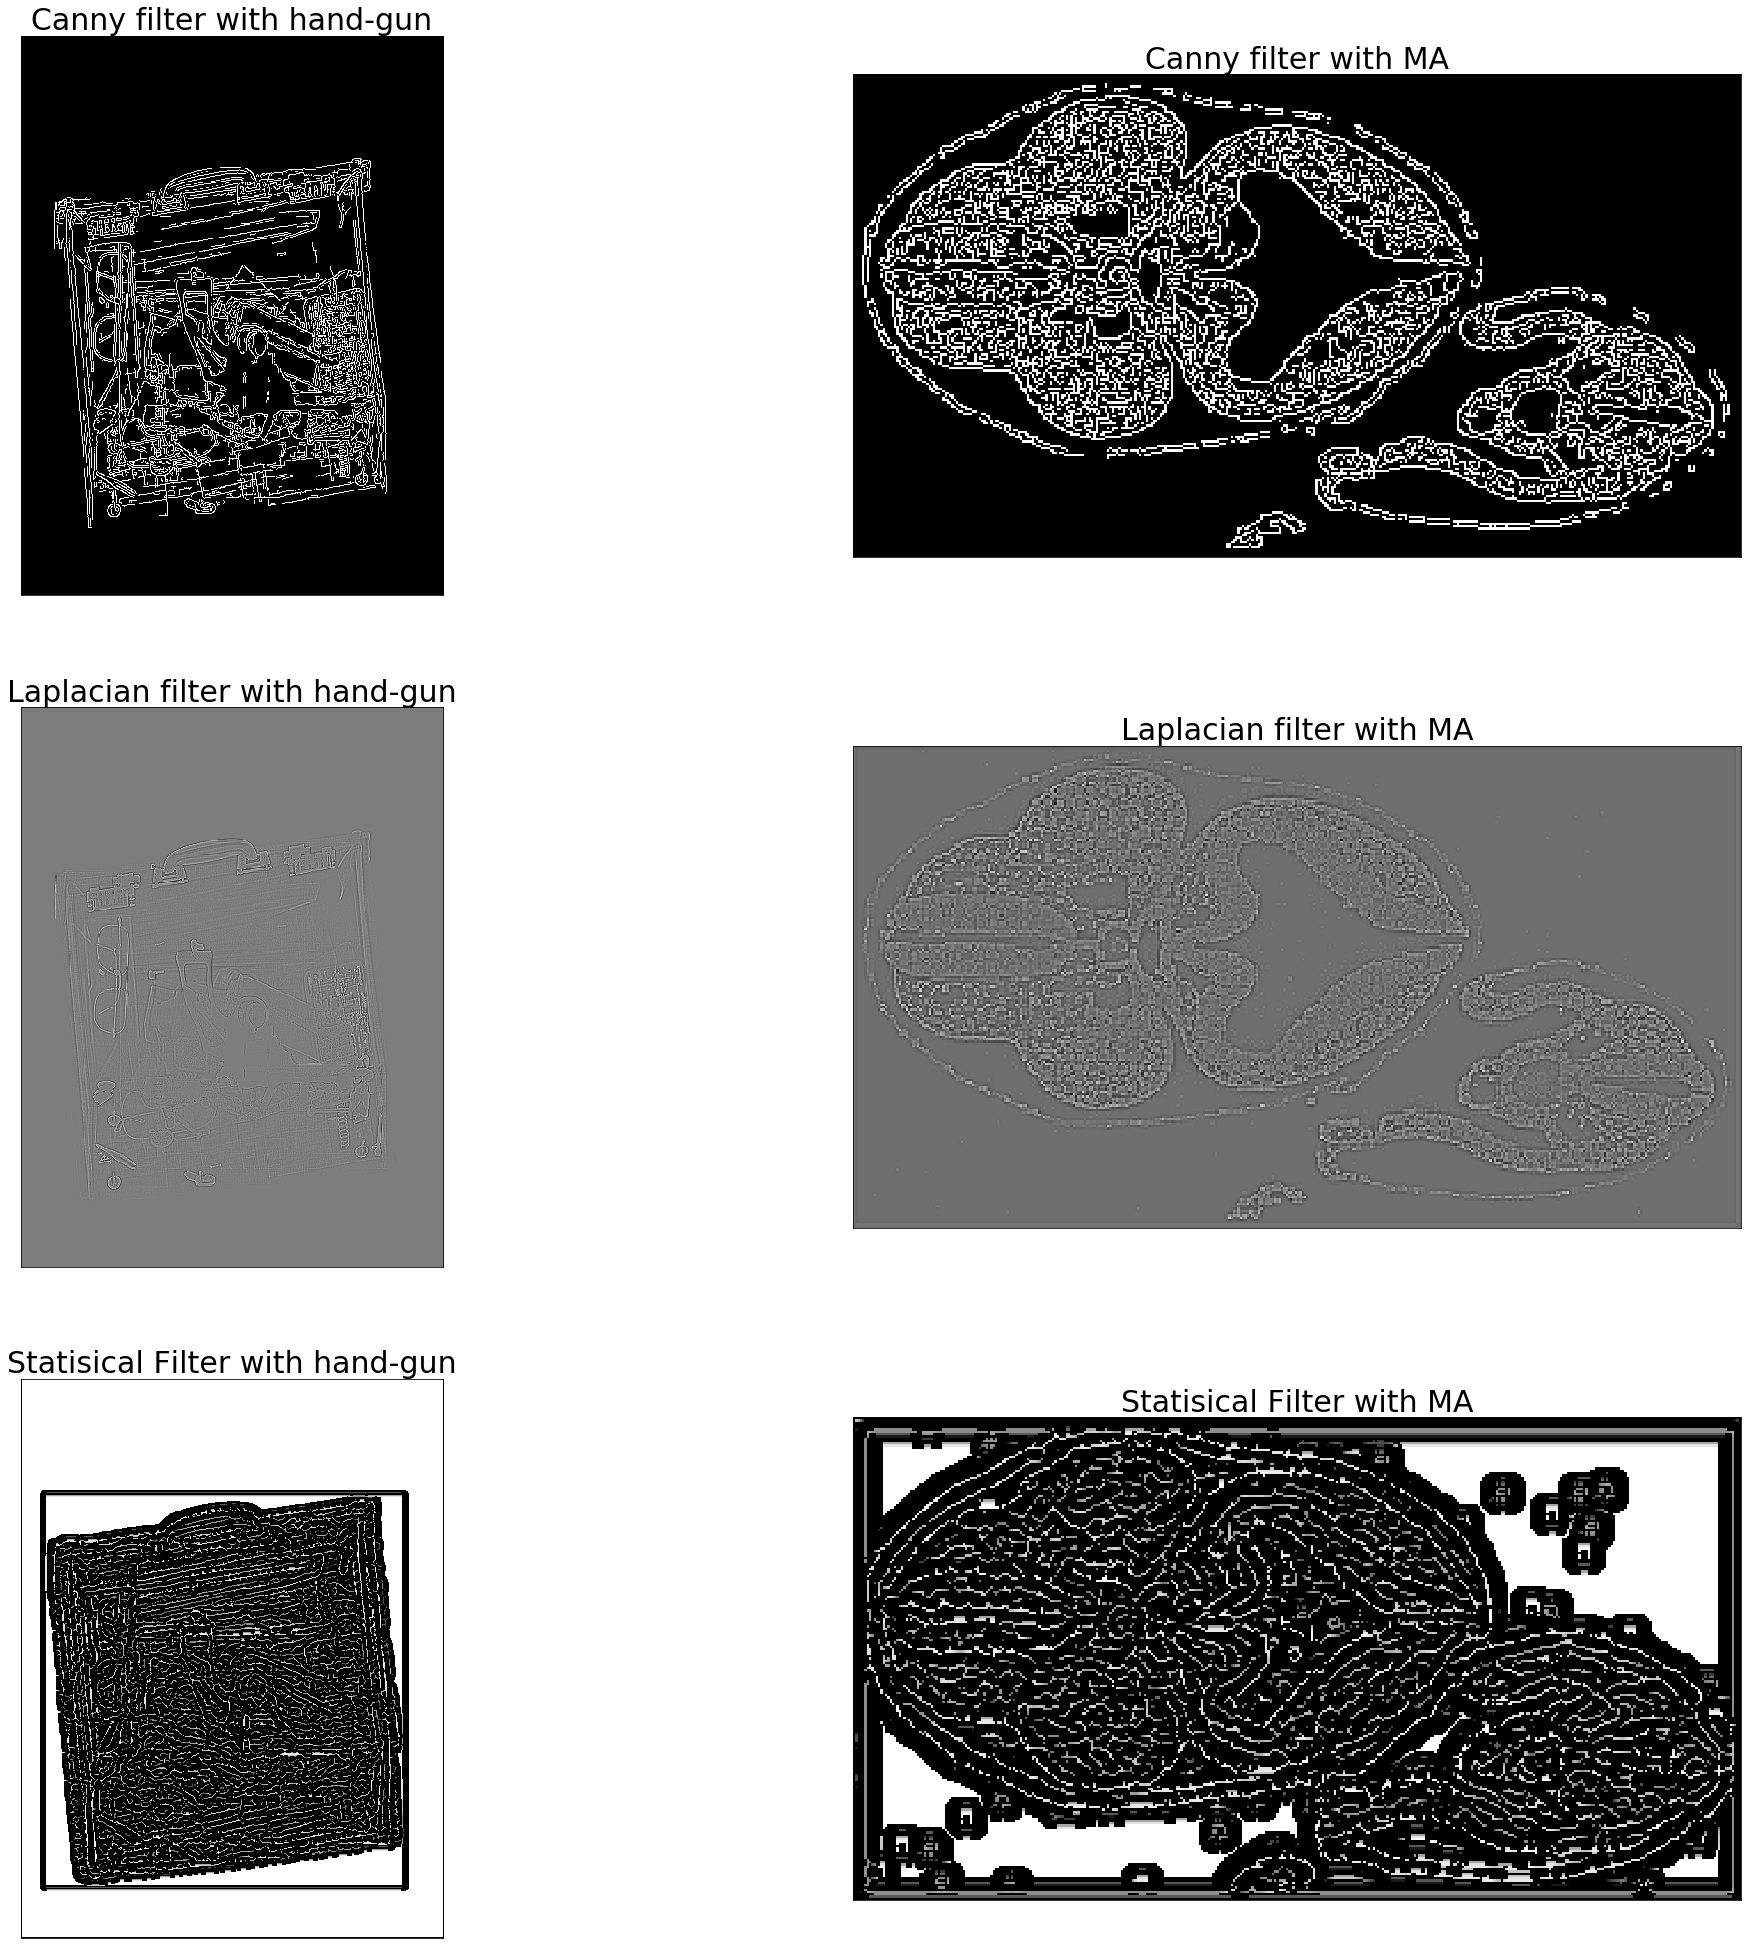

In [1]:
import cv2
import matplotlib.pyplot as plt
img_gun=cv2.imread('images/gun.png',0)
img_ma=cv2.imread('images/mouse.png',0)

canny_gun = cv2.Canny(img_gun,100,200)
laplacian_gun =cv2.Laplacian(img_gun,cv2.CV_64F)
canny_ma = cv2.Canny(img_ma,100,200)
laplacian_ma =cv2.Laplacian(img_ma,cv2.CV_64F)
img_stast_gun=cv2.imread('images/results/non_maximum_Supresstion_K_7.png',0)
img_stast_ma=cv2.imread('images/results/non_maximum_Supresstion_MA_K_7.png',0)

plt.figure(figsize=(35, 35))
plt.rcParams.update({'font.size': 25})
plt.subplot(3,2,1),plt.imshow(canny_gun ,cmap = 'gray')
plt.title('Canny filter with hand-gun'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(canny_ma,cmap = 'gray')
plt.title('Canny filter with MA'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,3),plt.imshow(laplacian_gun,cmap = 'gray')
plt.title('Laplacian filter with hand-gun'),plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(laplacian_ma,cmap = 'gray')
plt.title('Laplacian filter with MA'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,5),plt.imshow(img_stast_gun,cmap = 'gray')
plt.title('Statisical Filter with hand-gun'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(img_stast_ma,cmap = 'gray')
plt.title('Statisical Filter with MA'), plt.xticks([]), plt.yticks([])
plt.show()